In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('D:/Python/Datasets/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [5]:
df['value'] = df['math score'] * df['reading score']

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,value
0,female,group B,bachelor's degree,standard,none,72,72,74,5184
1,female,group C,some college,standard,completed,69,90,88,6210
2,female,group B,master's degree,standard,none,90,95,93,8550
3,male,group A,associate's degree,free/reduced,none,47,57,44,2679
4,male,group C,some college,standard,none,76,78,75,5928


In [7]:
df.rename(columns={'value': 'math and reading score'}, inplace=True)

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math and reading score
0,female,group B,bachelor's degree,standard,none,72,72,74,5184
1,female,group C,some college,standard,completed,69,90,88,6210
2,female,group B,master's degree,standard,none,90,95,93,8550
3,male,group A,associate's degree,free/reduced,none,47,57,44,2679
4,male,group C,some college,standard,none,76,78,75,5928


In [9]:
df.drop(['math and reading score'], axis=1, inplace=True)

In [10]:
df.rename(columns={'race/ethnicity' : 'race', 'test preparation course' : 'test preparation'}, inplace=True)

In [11]:
df.head()

,gender,race,parental level of education,lunch,test preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.rename(columns={'parental level of education': 'parent education'}, inplace=True)

In [13]:
df.head()

,gender,race,parent education,lunch,test preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
df[['gender', 'math score', 'reading score']]

,gender,math score,reading score
0,female,72,72
1,female,69,90
2,female,90,95
3,male,47,57
4,male,76,78
...,...,...,...
995,female,88,99
996,male,62,55
997,female,59,71
998,female,68,78


In [16]:
x = df.groupby(['gender', 'race'])['math score', 'reading score', 'writing score'].count()

<ipython-input-16-6a65c1b54131>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = df.groupby(['gender', 'race'])['math score', 'reading score', 'writing score'].count()


In [17]:
x.head(15)

math score  reading score  writing score
gender race                                             
female group A          36             36             36
       group B         104            104            104
       group C         180            180            180
       group D         129            129            129
       group E          69             69             69
male   group A          53             53             53
       group B          86             86             86
       group C         139            139            139
       group D         133            133            133
       group E          71             71             71

In [18]:
(df['gender'] == 'female').value_counts()

True     518
False    482
Name: gender, dtype: int64

In [19]:
df.describe(include='all')

,gender,race,parent education,lunch,test preparation,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [20]:
df.isnull().sum()

gender              0
race                0
parent education    0
lunch               0
test preparation    0
math score          0
reading score       0
writing score       0
dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

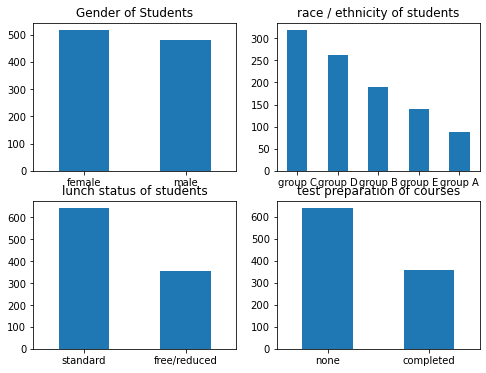

In [21]:
plt.subplot(221)
df['gender'].value_counts().plot(kind = 'bar', title = 'Gender of Students', figsize=(8, 6))
plt.xticks(rotation = 0)

plt.subplot(222)
df['race'].value_counts().plot(kind = 'bar', title = 'race / ethnicity of students', figsize= (8, 6))
plt.xticks(rotation = 0)

plt.subplot(223)
df['lunch'].value_counts().plot(kind = 'bar', title = 'lunch status of students', figsize = (8, 6))
plt.xticks(rotation = 0)

plt.subplot(224)
df['test preparation'].value_counts().plot(kind = 'bar', title = 'test preparation of courses', figsize = (8, 6))
plt.xticks(rotation = 0)

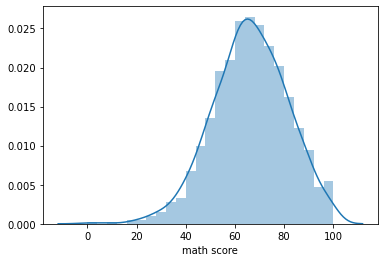

In [22]:
sns.distplot(df['math score'])

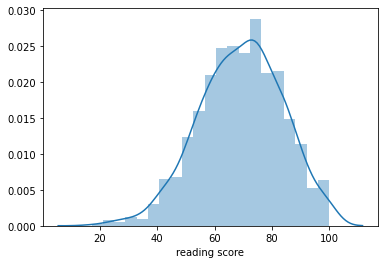

In [23]:
sns.distplot(df['reading score'])

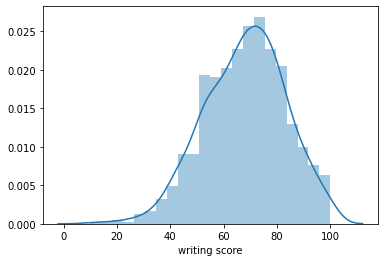

In [24]:
sns.distplot(df['writing score'])

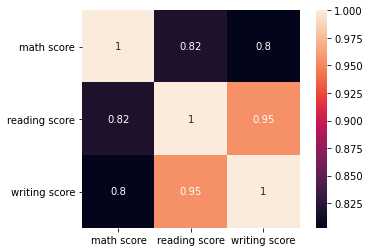

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation= 0)
plt.show()

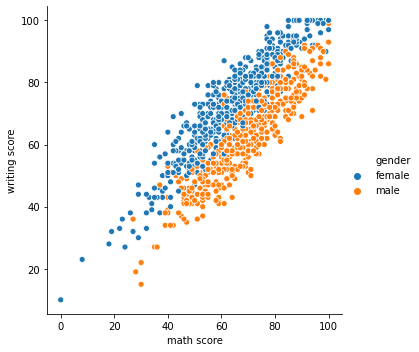

In [30]:
sns.relplot(x ='math score', y = 'writing score', hue= 'gender', data=df)

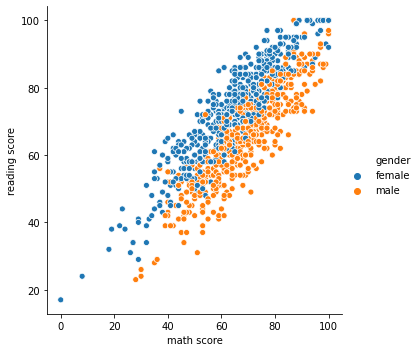

In [31]:
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender', data = df)

In [32]:
df.groupby('parent education')['math score'].mean()

parent education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [33]:
df.groupby('parent education')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
parent education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


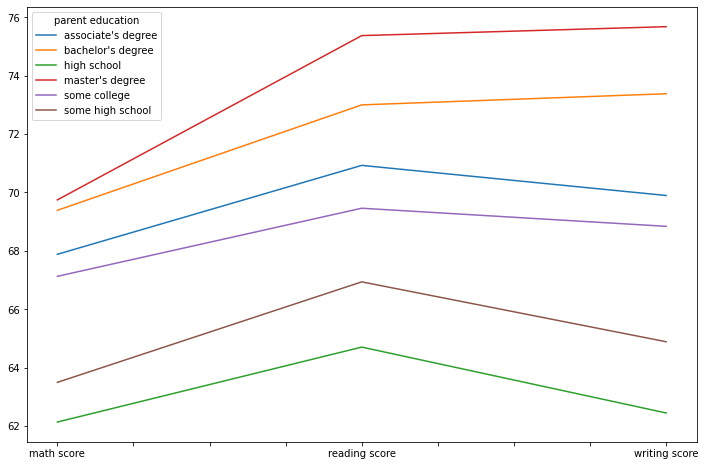

In [34]:
df.groupby('parent education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12, 8))

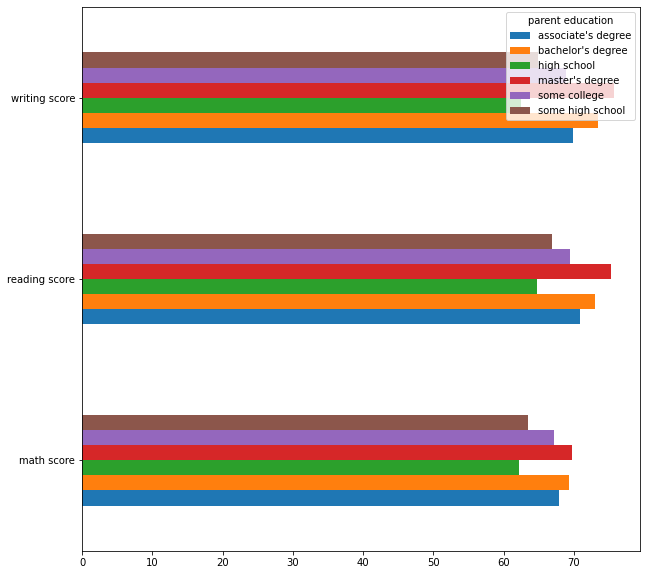

In [35]:
df.groupby('parent education')[['math score', 'reading score', 'writing score']].mean().T.plot(kind= 'barh',figsize=(10, 10))

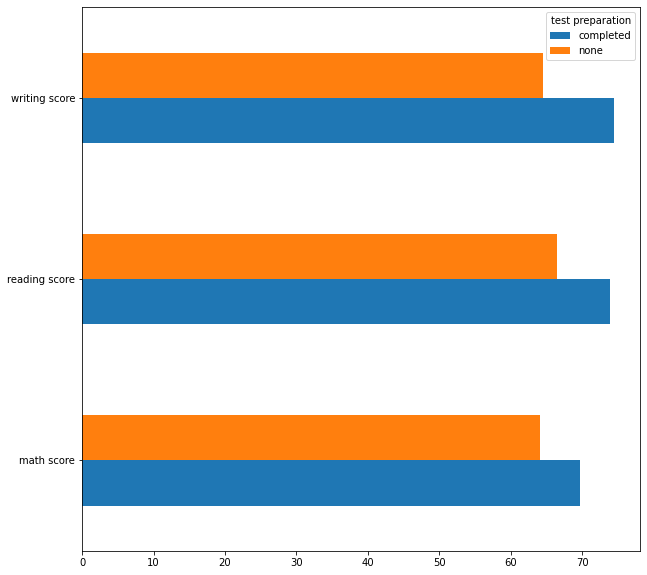

In [36]:
df.groupby('test preparation')[['math score', 'reading score', 'writing score']].mean().T.plot(kind= 'barh',figsize=(10, 10))